In [47]:
import networkx as nx
import numpy as np
import scipy 
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt
import scipy.optimize as optim
import pysal
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib
import seaborn as sns
from tqdm import tqdm
sns.set()
sns.set_context("talk", font_scale = 1.5)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
#matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [10, 7]

In [48]:
G = nx.generators.random_graphs.connected_watts_strogatz_graph(100,4,.1)
A = nx.convert_matrix.to_numpy_array(G)

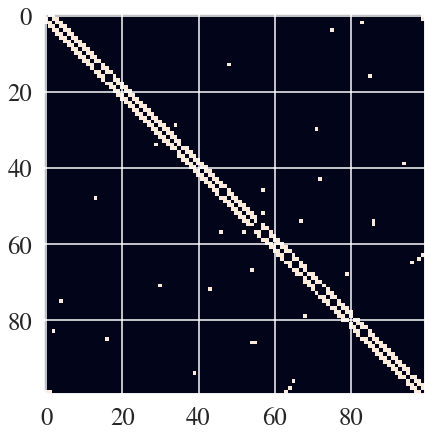

In [49]:
plt.imshow(A)

In [50]:
def euler_char(A,G):
    Betti1 = []
    edge = []
    vert = []
    com = []
    As = []
    Ms = []
    
    thresh = np.linspace(0,1,10)
    
    Mat = nx.convert_matrix.to_numpy_array(G)
    
    for t in thresh:
        
        M = np.array(Mat)
        
        #Binary Image
#         A = (A - A.min())/(A.max() - A.min())
        binary = (A <= t)*1
        #Adjust Adjaceny Matrix
        count = 0
        for i in range(len(A)):
            if binary[i] == 0:
                M[count,:] = 0
                M[:,count] = 0
            count += 1

        #Number Edges
        Edges = np.sum(M)/2
        
        #Number Vertices
        Vertices = np.sum(binary)
        
        removed_Vertices = np.shape(M)[0] - Vertices
        
        #Number Connected Components
        graph = csr_matrix(M)
        n_comp = connected_components(csgraph = graph, directed = False, return_labels = False)
        n_comp = n_comp - removed_Vertices
        
        #Betti 1
        B1 = n_comp - Vertices + Edges
        
        Betti1.append(B1)
        
        edge.append(Edges)
        
        vert.append(Vertices)
        
        com.append(n_comp)
        
        As.append(binary)
        
        Ms.append(M)
        
    return Betti1

In [51]:
betti1s = []
C = []
com1s = []
for i in range(100):
#     A = np.absolute(np.random.normal(.3,.2,400))
    A = np.sort(np.random.rand(100))
    G = nx.generators.random_graphs.connected_watts_strogatz_graph(100,4,.5)
    a= np.stack(euler_char(A,G))
    betti1s.append(a)
    com1s.append(com1)
    C.append(nx.algorithms.cluster.average_clustering(G))

NameError: name 'com1' is not defined

In [52]:
betti1z = np.vstack(betti1s)
com1z = np.stack(com1s)
C1z = np.stack(C)

ValueError: need at least one array to stack

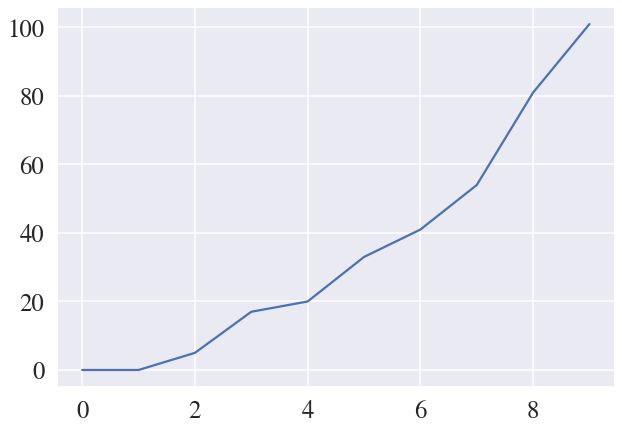

In [53]:
plt.plot(betti1z.T)

In [54]:
betti2s = []
C = []
com2s = []
for i in range(100):
#     A = np.absolute(np.random.normal(.3,.2,400))
    A = np.sort(np.random.rand(100))
    G = nx.generators.random_graphs.connected_watts_strogatz_graph(100,4,.3)
    a = np.stack(euler_char(A,G))
    betti2s.append(a)
    com2s.append(com2)
    C.append(nx.algorithms.cluster.average_clustering(G))

NameError: name 'com2' is not defined

In [55]:
betti2z = np.vstack(betti2s)
com2z = np.stack(com2s)
C2z = np.stack(C)

ValueError: need at least one array to stack

Text(0.5, 0, 'filtration level')

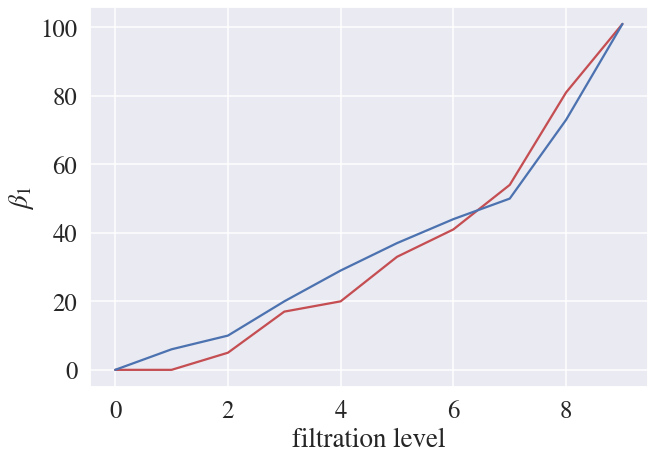

In [56]:
plt.plot(betti1z.T,'r')
plt.plot(betti2z.T,'b')
plt.ylabel(r"$\beta_1$")
plt.xlabel("filtration level")

In [57]:
plt.plot(C2z)
plt.plot(C1z)

NameError: name 'C2z' is not defined

In [58]:
import scipy.optimize as optim
p0 = np.random.exponential(size = 3)
bounds = (0,[100000,100,2000000])

def logistic(t,a,b,c):
    return c/(1+a*np.exp(-b*t))

def fit_log(Data,thresh):
#     params = []
#     for i in range(len(Data)):
    p0 = np.random.exponential(size = 3)
    bounds = (0,[1000,500,3000])
    x = thresh
#         y = (Data[i] - Data[i].min())/(Data[i].max() - Data[i].min())
    y = Data
    (a,b,c),cov = optim.curve_fit(logistic,x,y,bounds = bounds, p0=p0)
    param = [a,b,c]
#         params.append(param)
    return param

In [59]:

thresh = np.linspace(0,.9,10)
yeahboy = np.linspace(0,.9,10)

AllCz = []
AllBettiz = []
paramz = []
lengthz = []
midz = []
for j in tqdm(yeahboy):
    C = []
    params = []
    length = []
    mids = []
    for i in range(150):
        A = (np.random.rand(200))
        G = nx.generators.random_graphs.connected_watts_strogatz_graph(200,5,j)
        param = fit_log(euler_char(A,G),thresh)
        C.append(nx.algorithms.cluster.average_clustering(G))
        params.append(np.stack(param))
        length.append(nx.average_shortest_path_length(G))
        mids.append(euler_char(A,G)[4])
    lengthz.append(length)
    paramz.append(params)
    AllCz.append(np.stack(C))
    midz.append(mids)

100%|██████████████████████████████████████████| 10/10 [03:55<00:00, 23.55s/it]


In [60]:
paramzz = np.asarray(paramz)
midzz = np.asarray(midz)

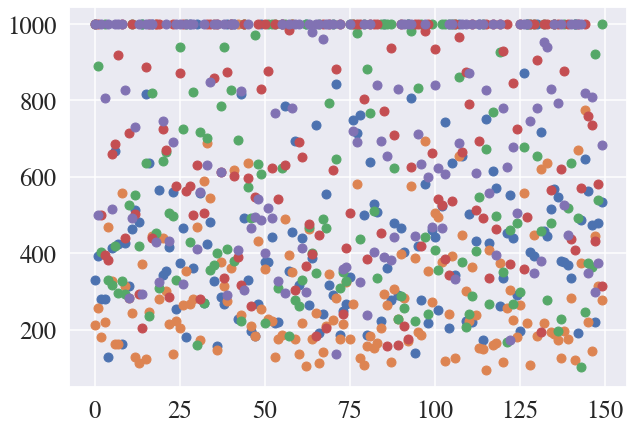

In [61]:
plt.plot(paramzz[1,:,0],'o')
plt.plot(paramzz[0,:,0],'o')
plt.plot(paramzz[2,:,0],'o')
plt.plot(paramzz[3,:,0],'o')
plt.plot(paramzz[7,:,0],'o')

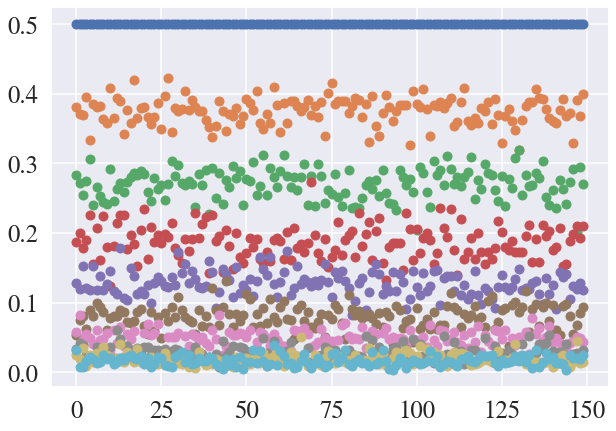

In [62]:
plt.plot(np.asarray(AllCz).T,'o')

In [63]:
data = np.mean(paramzz[:,:,0],axis = 1)
data1 = np.mean(paramzz[:,:,1],axis = 1)
data2 = np.mean(paramzz[:,:,2],axis = 1)
data3 = np.mean(np.asarray(AllCz),axis = 1)
data4 = np.mean(np.asarray(lengthz),axis = 1)

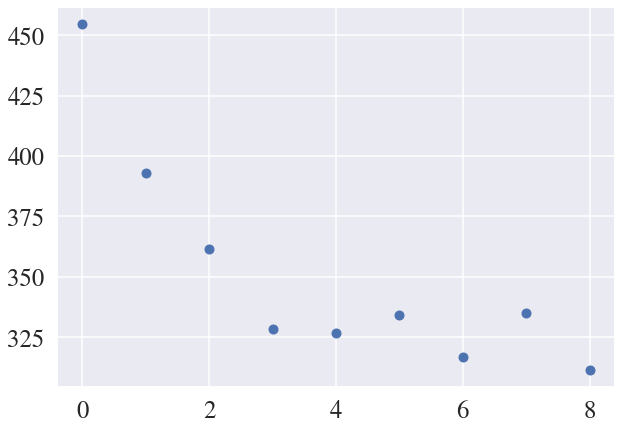

In [64]:
# plt.plot(data)
# plt.plot(data2)
plt.plot(data2[1::],'o')

In [15]:
plt.plot(yeahboy,data2,'o')

NameError: name 'data2' is not defined

In [16]:
plt.plot(yeahboy,data,'o')
plt.ylabel(r"Mean $\beta_1$ Maximal Growth Value")
plt.xlabel("Watts-Strogatz $p$ Value")

NameError: name 'data' is not defined

In [17]:
plt.plot(yeahboy,data1,'o')
plt.ylabel(r"Mean $\beta_1$ Maximal Growth Value")
plt.xlabel("Watts-Strogatz $p$ Value")

NameError: name 'data1' is not defined

In [18]:
plt.plot(data4[1::],data1[1::],'o')

NameError: name 'data4' is not defined

In [19]:
plt.plot(np.mean(midz,axis = 1),'o')

IndexError: tuple index out of range

In [20]:
plt.plot(data3,'o')

NameError: name 'data3' is not defined

In [66]:
def euler_char(A,G,thresh):
    Betti1 = []
    edge = []
    vert = []
    com = []
    As = []
    Ms = []
    
    Mat = nx.convert_matrix.to_numpy_array(G)
    
    for t in thresh:
        
        M = np.array(Mat)
        
        #Binary Image
#         A = (A - A.min())/(A.max() - A.min())
        binary = (A <= t)*1
        #Adjust Adjaceny Matrix
        count = 0
        for i in range(len(A)):
            if binary[i] == 0:
                M[count,:] = 0
                M[:,count] = 0
            count += 1

        #Number Edges
        Edges = np.sum(M)/2
        
        #Number Vertices
        Vertices = np.sum(binary)
        
        removed_Vertices = np.shape(M)[0] - Vertices
        
        #Number Connected Components
        graph = csr_matrix(M)
        n_comp = connected_components(csgraph = graph, directed = False, return_labels = False)
        n_comp = n_comp - removed_Vertices
        
        #Betti 1
        B1 = n_comp - Vertices + Edges
        
        Betti1.append(B1)
        
        edge.append(Edges)
        
        vert.append(Vertices)
        
        com.append(n_comp)
        
        As.append(binary)
        
        Ms.append(M)
        
    return Betti1

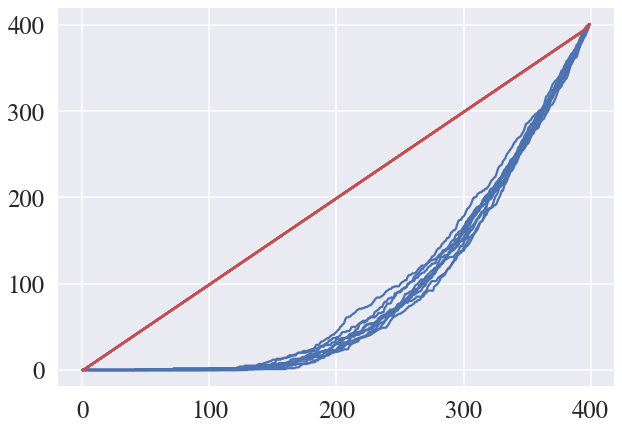

In [73]:
for i in range(10):
    
    k = np.random.randint(0,400)
    
    what = dists[:,k] + np.random.rand(400)*.000001
    
    A = np.random.rand(400)
    
    G = nx.generators.random_graphs.connected_watts_strogatz_graph(400,5,.999999999999)
    test = euler_char(np.sort(A),G,np.sort(A))

    plt.plot(test,'b')
               
for i in range(10):

    k = np.random.randint(0,400)
    
    what = dists[:,k] + np.random.rand(400)*.000001
    
    A = np.random.rand(400)
    
    G = nx.generators.random_graphs.connected_watts_strogatz_graph(400,5,.0000000000000000001)
    test = euler_char(np.sort(A),G,np.sort(A))

    plt.plot(test,'r')

In [68]:
# A = np.sort(np.random.rand(400))
G = nx.generators.random_graphs.connected_watts_strogatz_graph(400,5,.5)
test1 = euler_char(what,G,np.sort(what))

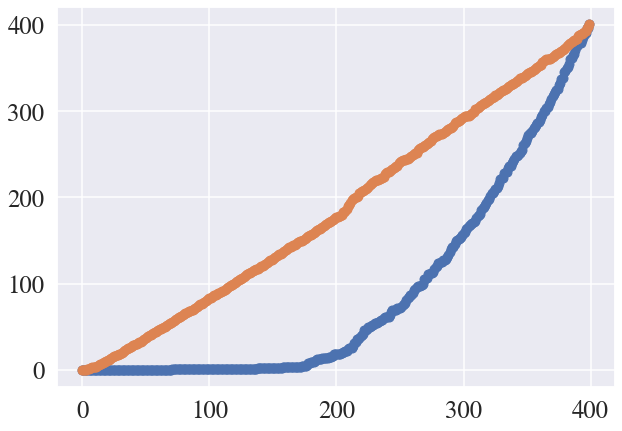

In [69]:
G = nx.generators.random_graphs.connected_watts_strogatz_graph(400,5,.99999999999999999999999999999)
test1 = euler_char(what,G,np.sort(what))
plt.plot(test1,'o')

G = nx.generators.random_graphs.connected_watts_strogatz_graph(400,5,.000000000000000000000001)
test1 = euler_char(what,G,np.sort(what))
plt.plot(test1,'o')

In [ ]:
plt.plot(np.diff(test),'o')
plt.plot(np.diff(test1),'o')

In [ ]:
def make_matrix(rows, cols):
    n = rows*cols
    M = np.zeros((n,n))
    for r in range(rows):
        for c in range(cols):
            i = r*cols + c
            # Two inner diagonals
            if c > 0: M[i-1,i] = M[i,i-1] = 1
            # Two outer diagonals
            if r > 0: M[i-cols,i] = M[i,i-cols] = 1
                
    return M

In [ ]:
okay = []

for i in range(20):
    for j in range(20):
        ok = [i,j]
        okay.append(ok)

In [ ]:
import scipy.spatial.distance as ds

okaz = np.stack(okay)

In [ ]:
dist = ds.pdist(okaz)

In [ ]:
dists = ds.squareform(dist)

In [ ]:
plt.plot(dists[:,100] + np.random.rand(400)*.000001)

In [33]:
what = dists[:,100] + np.random.rand(400)*.000001


In [34]:
np.shape(np.unique(what))

(400,)